## San Antonio City Salary Data

Data set by Annie Millrbernd
https://data.world/amillerbernd/san-antonio-city-salary-data

**DESCRIPTION**
Compensation of San Antonio City Employees, 2012-2016. All data provided by the City of San Antonio.
SUMMARY
About this Dataset

Included in these data are all the earnings and some demographic information about city employees.

**Objectives**

Collection, retention, annual presentation

**Background**

1Hire Date reflects the most recent date of hire with the City in the event the employee left employment and was rehired or was a temporary employee and became a full time permanent employee.	
2Annual Salary reflects what the employee's current base salary would be for a year based on the position held at September 30, 2016.	
3Base Pay reflects the regular salary the employee actually earned during the fiscal year regardless of position held. It is possible with position changes, length of time with the City, etc. that an employee's Base Pay will not equal their Annual Salary.	
4Leave Payout reflects leave the employee sold back to the City during the fiscal year. For full-time employees who separated during the fiscal year this may also include accrued leave sold back to the City upon separation.	
5Other reflects various incentives paid to City employees based on their job position and education level. Incentives include but are not limited to education pay; language skill pay; certification pay; car allowance; transportation allowance; cell phone reimbursement; clothing allowance; and shift differential.	
6City policy allows employees to bank overtime hours for future compensated absences.	
7 Gross Earnings reflect the total pay employees received between October 1st and September 30th. 
8Additional Benefits are incremental costs incurred by the City of behalf of employees to include the employer's share of FICA/Medicare, TMRS [Pension], annual Health Assessment [average healthcare benefit costs] and other related fringe provided to employees.	
9Total Compensation reflects the total cost the City incurred for the employee's services received between October 1st and September 30th.	
10Federal law requires the City of San Antonio to keep records of its employees' race/ethnicity and sex and to report this information to the Equal Employment Opportunity Commission (EEOC). The EEOC identifies the acceptable methods for a city or state to acquire this information. The City follows EEOC 
requirements by obtaining the race/ethnicity information from employees through voluntary reporting (self identification) or from visual surveys of its workforce. Therefore, the City cannot guarantee the complete accuracy of this information.

## Key questions: 

### 1. Are there any trends in pay based on gender
### 2. Are there any trends in pay based on race
### 3. What is the biggest city department (based on number of employees)
### 4. What is the most high paying-department (based on total salary)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

In [5]:
city_data = pd.read_excel("FY16 SA City Compensation.xlsx")

In [91]:
max_salary = city_data["FY16 TOTAL COMPENSATION9"] == city_data["FY16 TOTAL COMPENSATION9"].max()

In [92]:
city_data[max_salary]

,REF #,FIRST NAME,MIDDLE NAME,LAST NAME,HIRE DATE1,FY16 ANNUAL SALARY2,FY16 BASE PAY3,FY16 LEAVE PAYOUT4,FY16 OTHER5,FY16 OVERTIME6,FY16 GROSS EARNINGS7,FY16 ADDITIONAL BENEFITS8,FY16 TOTAL COMPENSATION9,JOB TITLE,BUSINESS AREA,GENDER,ETHNIC ORIGIN10,EMPLOYEE SUBGROUP
0,1,SHERYL,L.,SCULLEY,38663,425000.0,414615.38,0.0,97354.89,0.0,511970.27,75379.48,587349.75,1022-CITY MANAGER,CITY MANAGER'S OFFICE,FEMALE,WHITE,2A CITY MGR FT


### Q1: Are there any trends in pay based on gender

In [10]:
city_data.groupby("GENDER")["FY16 TOTAL COMPENSATION9"].count()

GENDER
FEMALE    4138
MALE      7785
Name: FY16 TOTAL COMPENSATION9, dtype: int64

In [25]:
city_data.groupby("GENDER")["FY16 TOTAL COMPENSATION9"].mean().round(0)

GENDER
FEMALE    55991.0
MALE      95136.0
Name: FY16 TOTAL COMPENSATION9, dtype: float64

In [36]:
female_mean = round(city_data[city_data.GENDER == "FEMALE"]["FY16 TOTAL COMPENSATION9"].mean(), 1)
male_mean = round(city_data[city_data.GENDER == "MALE"]["FY16 TOTAL COMPENSATION9"].mean(), 1)

Text(1, 80000, '$95136.0')

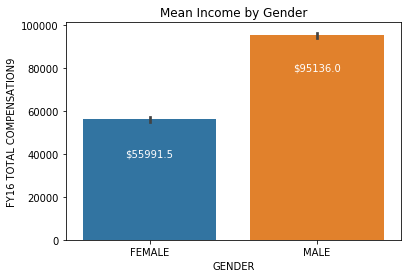

In [46]:
sns.barplot(x="GENDER", y="FY16 TOTAL COMPENSATION9", data=city_data)
plt.title("Mean Income by Gender")
plt.text(
    0,
    40000,
    f'${female_mean}',
    ha='center',
    va='center',
    color='white'
)
plt.text(
    1,
    80000,
    f'${male_mean}',
    ha='center',
    va='center',
    color='white'
       )

### 2. Are there any trends in pay based on race

In [114]:
ethnic_columns = city_data[["ETHNIC ORIGIN10", "FY16 TOTAL COMPENSATION9"]]

Text(0.5, 1.0, 'Count of individuals by race')

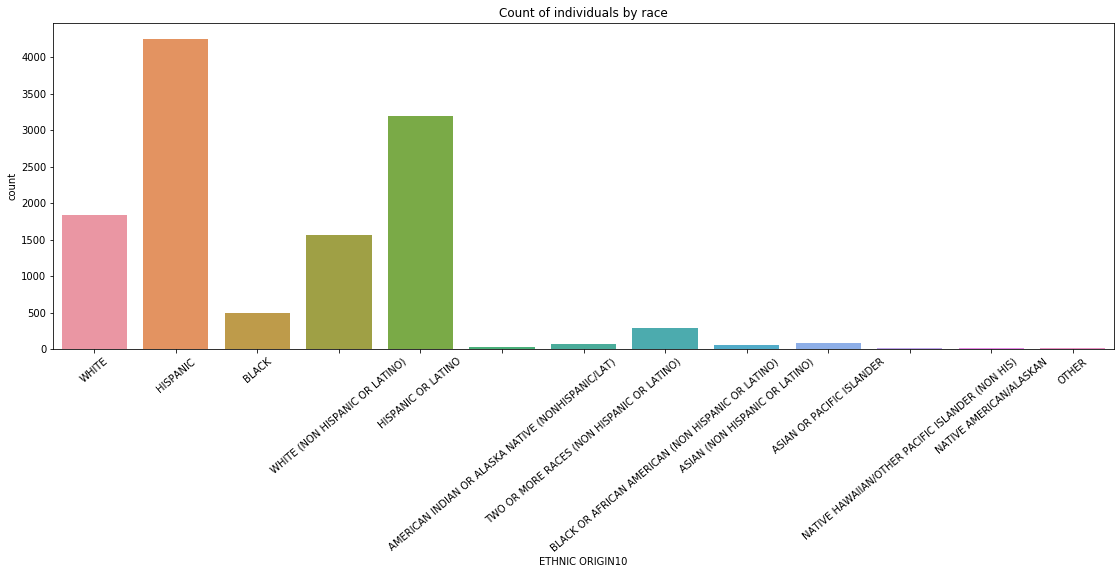

In [275]:
plt.figure(figsize=(19,6))
sns.countplot(x="ETHNIC ORIGIN10", data=city_data, orient='v')
plt.xticks(rotation=40)
plt.title("Count of individuals by race")

Text(0, 0.5, 'Mean Compensation')

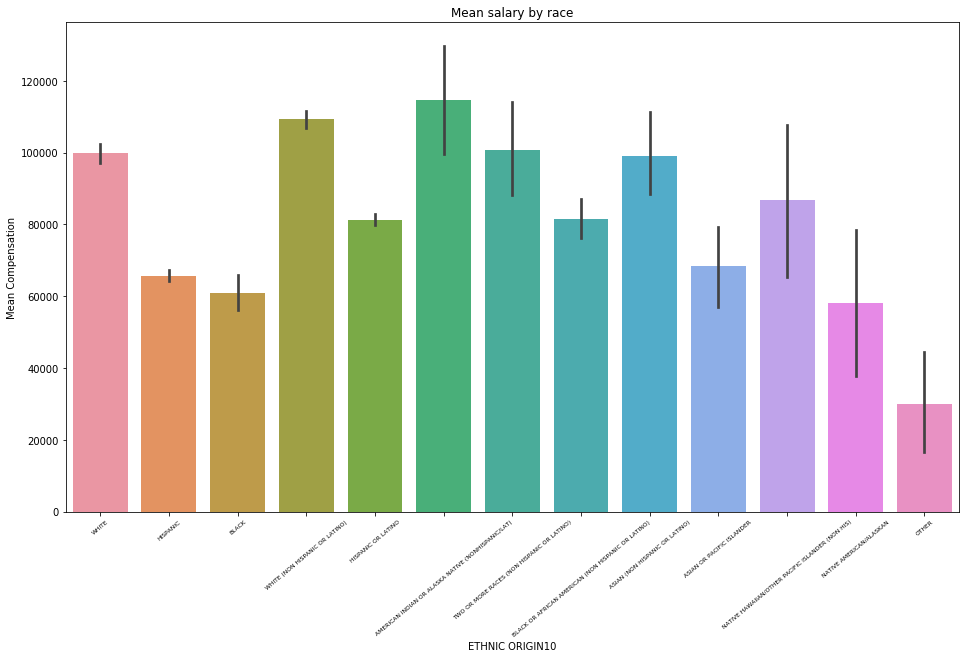

In [140]:
plt.figure(figsize=(16,9))
sns.barplot(data=city_data, x="ETHNIC ORIGIN10", y="FY16 TOTAL COMPENSATION9")
plt.xticks(rotation = 40, fontsize=6)
plt.title("Mean salary by race")
plt.ylabel("Mean Compensation")

Text(0, 0.5, 'Mean Compensation')

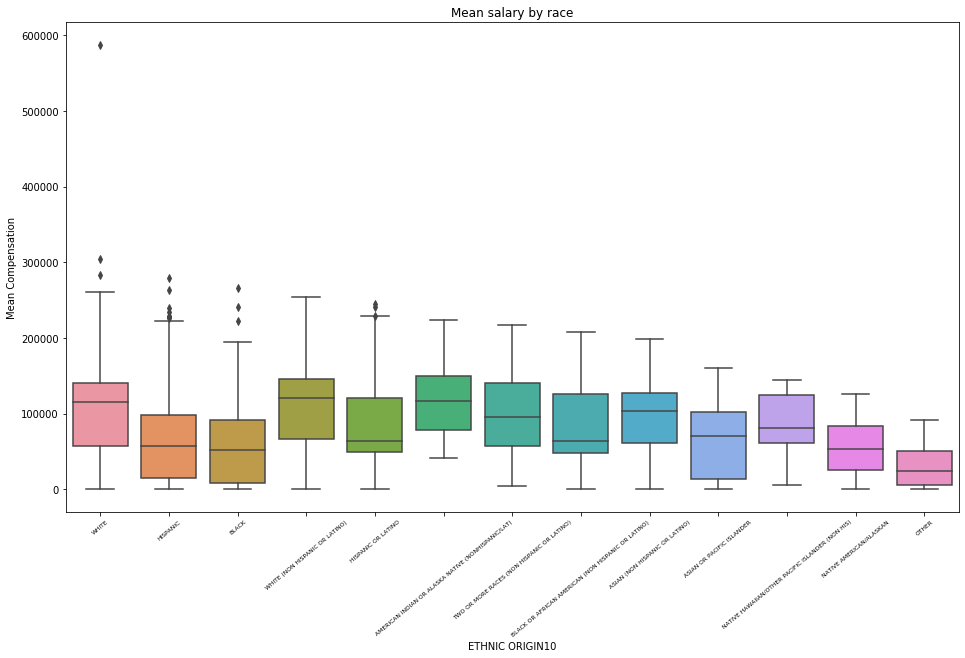

In [150]:
plt.figure(figsize=(16,9))
sns.boxplot(data=city_data, x="ETHNIC ORIGIN10", y="FY16 TOTAL COMPENSATION9")
plt.xticks(rotation = 40, fontsize=6)
plt.title("Mean salary by race")
plt.ylabel("Mean Compensation")

### 3. What is the biggest city department (based on number of employees)

In [276]:
city_data.groupby("BUSINESS AREA")["REF #"].count().sort_values(ascending = False)

BUSINESS AREA
POLICE                                           3013
FIRE                                             1772
HUMAN RESOURCES                                   829
TRANSPORTATION & CAPITAL IMPROV                   776
PARKS AND RECREATION                              639
SOLID WASTE MANAGEMENT                            630
LIBRARY                                           488
PRE K 4 SA                                        463
AVIATION                                          431
DEVELOPMENT SERVICES                              391
SA METRO HEALTH DISTRICT                          326
DEPARTMENT OF HUMAN SERVICES                      318
ITSD                                              318
CONVENTION & SPORTS FACILITIES                    291
BUILDING & EQUIPMENT SERVICES                     169
MUNICIPAL COURTS                                  166
FINANCE                                           157
CENTER CITY DEVELOPMENT & OPERATIONS              137
ANIMAL CARE SE

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

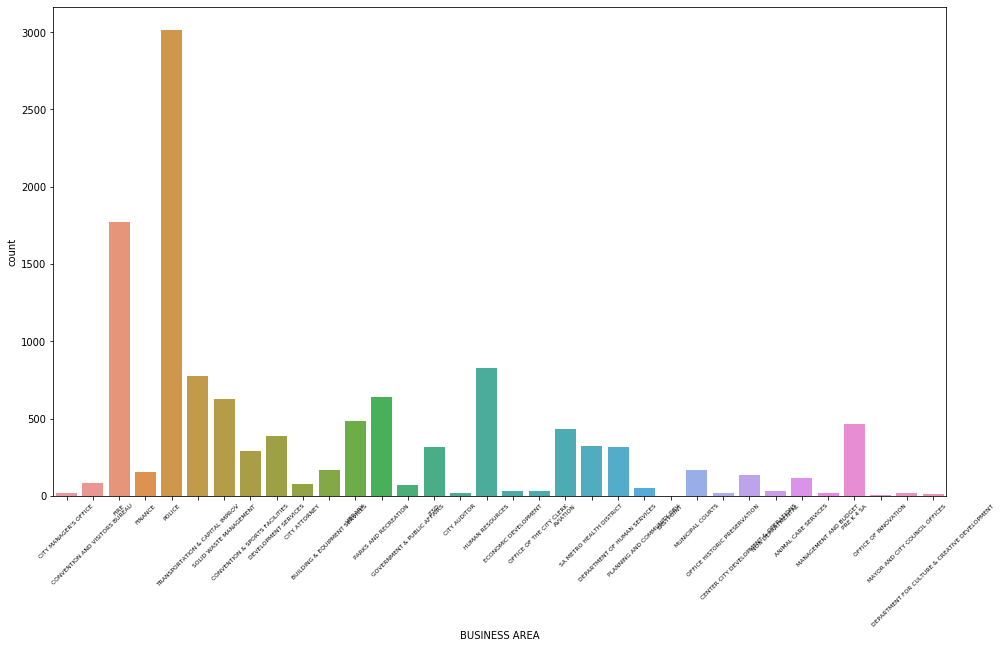

In [137]:
plt.figure(figsize=(16,9))
sns.countplot(data=city_data, x="BUSINESS AREA")
plt.xticks(rotation=45, fontsize=6)

In [241]:
count_emp = city_data.groupby("BUSINESS AREA")["BUSINESS AREA","REF #"].count().sort_values(by="REF #", ascending=False).head(5)

In [243]:
count_emp

,BUSINESS AREA,REF #
BUSINESS AREA,,
POLICE,3013,3013
FIRE,1772,1772
HUMAN RESOURCES,829,829
TRANSPORTATION & CAPITAL IMPROV,776,776
PARKS AND RECREATION,639,639


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

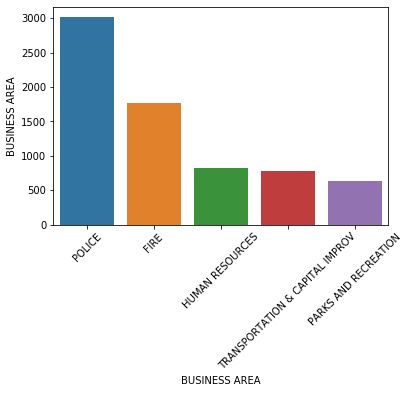

In [245]:
sns.barplot(data=count_emp, y="BUSINESS AREA", x=count_emp.index)
plt.xticks(rotation=45, fontsize=10)

### 4. What is the most high paying-department (based on total salary)

In [247]:
city_data.groupby("BUSINESS AREA")["FY16 TOTAL COMPENSATION9"].sum().round(1).sort_values(ascending=False).head(5)

BUSINESS AREA
POLICE                             337412361.2
FIRE                               235399728.9
TRANSPORTATION & CAPITAL IMPROV     49862168.5
SOLID WASTE MANAGEMENT              38358574.0
PARKS AND RECREATION                36607675.8
Name: FY16 TOTAL COMPENSATION9, dtype: float64

Text(0.5, 1.0, 'Total (sum) compensation by Business Area')

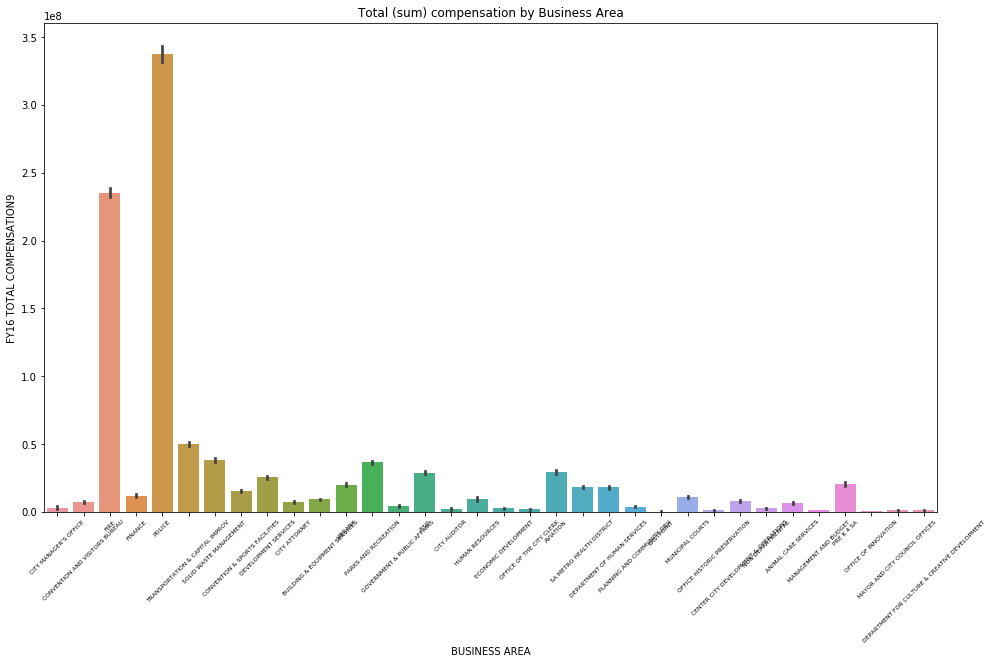

In [176]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=45, fontsize=6)
sns.barplot(data=city_data, x="BUSINESS AREA", y="FY16 TOTAL COMPENSATION9", estimator=sum)
plt.title("Total (sum) compensation by Business Area")


Text(0.5, 1.0, 'Mean compensation by Business Area')

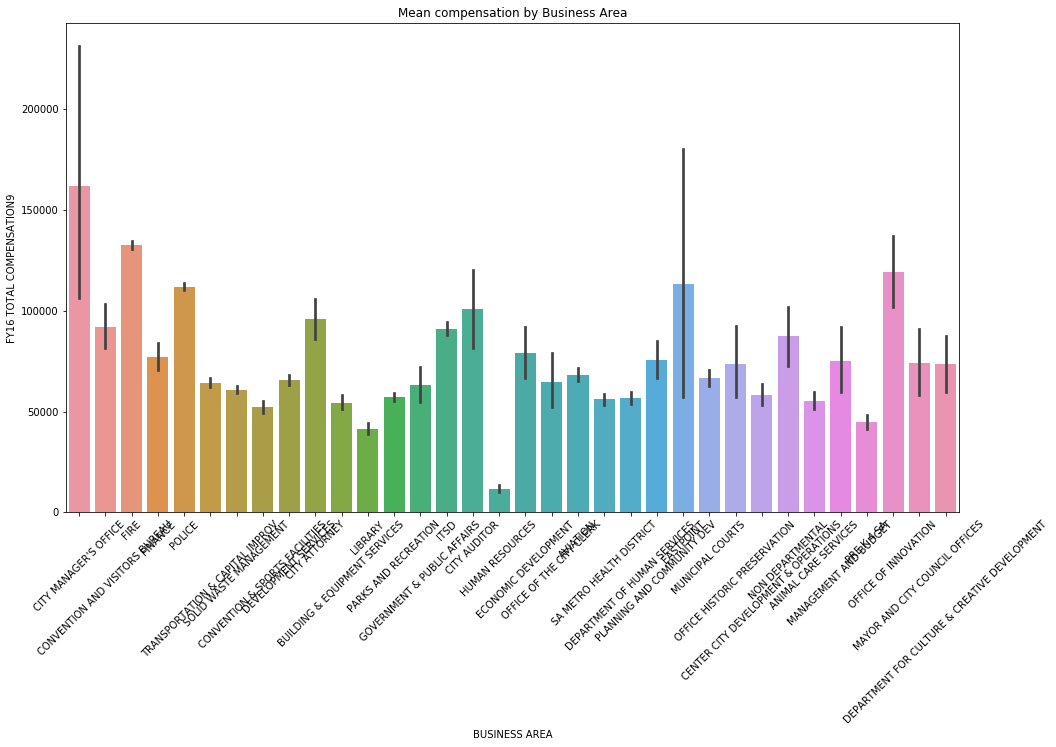

In [177]:
plt.figure(figsize=(16,9))
sns.barplot(data=city_data, x="BUSINESS AREA", y= "FY16 TOTAL COMPENSATION9", orient='v')
plt.xticks(rotation=45, fontsize=10)
plt.title("Mean compensation by Business Area")

### Top 5 for question 4

In [202]:
count = city_data.groupby("BUSINESS AREA")["BUSINESS AREA", "FY16 TOTAL COMPENSATION9"].sum().sort_values(by="FY16 TOTAL COMPENSATION9", ascending=False).head(5)
mean_data = city_data.groupby("BUSINESS AREA")["BUSINESS AREA", "FY16 TOTAL COMPENSATION9"].mean().sort_values(by="FY16 TOTAL COMPENSATION9", ascending=False).head(5)

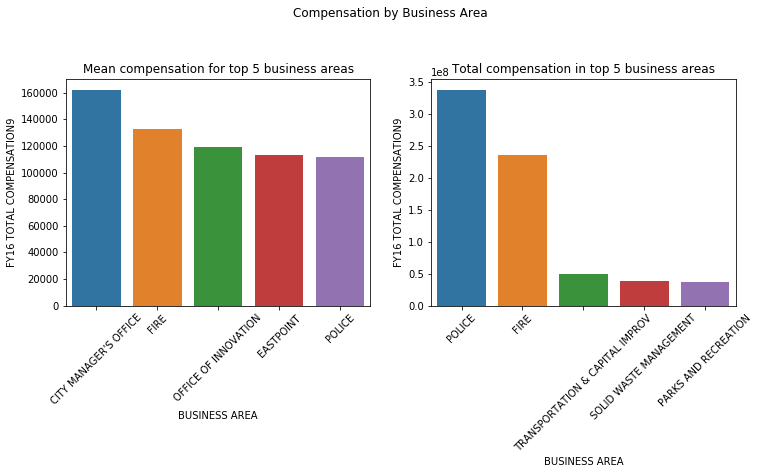

In [270]:
plt.figure(figsize=(12,10))
plt.suptitle("Compensation by Business Area")

plt.subplot(221)
sns.barplot(data=mean_data, x=mean_data.index, y="FY16 TOTAL COMPENSATION9")
plt.xticks(rotation=45, fontsize=10)
plt.title("Mean compensation for top 5 business areas")


plt.subplot(222)
# plt.yscale('linear')
sns.barplot(data=count, x=count.index, y="FY16 TOTAL COMPENSATION9")
plt.xticks(rotation=45, fontsize=10)
plt.title("Total compensation in top 5 business areas")


plt.subplots_adjust(hspace=0.4)

# Future Questions

* How has compensation changed over time (different data sets going all the way back to 2012? But separate sheets so would need to figure out a way to join them. 

* Which department had the most overtime / which one had the most leave payout. 

* Are there any trends or correlation as to which departments have the best base salaries, versus which have higher bonuses or other forms of rewards. 